In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [102]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.dpi']=100

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


## Import Data

In [3]:
path = '/gdrive/My Drive/Colab Notebooks/Untapped Energy - Well Status/'
# path = '../'
x_train_raw = pd.read_csv(path + 'Header - train.txt', sep=',')
x_vali_raw = pd.read_csv(path + 'Header - validation.txt', sep=',')

y_train_raw = pd.read_csv(path + 'Well_class_train.txt', sep=',')
y_vali_raw = pd.read_csv(path + 'Well_class_validate.txt', sep=',')

In [4]:
print(x_train_raw.shape)
print(y_train_raw.shape)
print(x_vali_raw.shape)
print(y_vali_raw.shape)

(588673, 90)
(588673, 3)
(132131, 90)
(132131, 3)


In [5]:
for status in y_train_raw['well_status_code'].unique(): 
    print(len(y_train_raw[y_train_raw['well_status_code']==status])/len(y_train_raw))
    print(len(y_vali_raw[y_vali_raw['well_status_code']==status])/len(y_vali_raw))

0.18059941597457332
0.17322959789905473
0.39789832385721785
0.37849558392807137
0.42150226016820885
0.4482748181728739


In [6]:
main = pd.merge(x_train_raw, y_train_raw, on='EPAssetsId', how='inner')
mainvali = pd.merge(x_vali_raw, y_vali_raw, on='EPAssetsId', how='inner')

In [7]:
print(np.all(main.duplicated()==False))
print(np.all(mainvali.duplicated()==False))

True
True


In [8]:
main.columns

Index(['EPAssetsId', 'Province', 'LicenceNumber', 'UWI', 'CurrentOperator',
       'CurrentOperatorParent', 'CurrentOperatorID', 'Licensee',
       'LicenseeParentCompany', 'LicenseeID', 'LicenceDate', 'WellType',
       'WellTypeStandardised', 'ConfidentialReleaseDate', 'SurfAbandonDate',
       'WellName', 'WellNameAmended', 'Formation', 'Field', 'Pool',
       'SurveySystem', 'Surf_Location', 'Surf_Township', 'Surf_Meridian',
       'Surf_Range', 'Surf_Section', 'Surf_LSD', 'Surf_Longitude',
       'Surf_Latitude', 'Surf_TownshipRange', 'Surf_QuarterUnit', 'Surf_Unit',
       'Surf_Block', 'Surf_NTSMapSheet', 'Surf_Series', 'Surf_Area',
       'Surf_Sheet', 'Surf_QuarterSection', 'BH_Location', 'BH_TownshipRange',
       'BH_QuarterUnit', 'BH_Unit', 'BH_Block', 'BH_NTSMapSheet', 'BH_Series',
       'BH_Area', 'BH_Sheet', 'BH_QuarterSection', 'BH_Longitude',
       'BH_Latitude', 'BH_Township', 'BH_Meridian', 'BH_Range', 'BH_Section',
       'BH_LSD', 'GroundElevation', 'KBElevation'

## Data QC and Feature Engineering

In [9]:
print(np.sum(main['Province'].isna()))
print(np.sum(mainvali['Province'].isna()))

0
0


In [10]:
print(np.sum(main['CurrentOperatorParent'].isna()))
print(np.sum(mainvali['CurrentOperatorParent'].isna()))

0
0


In [11]:
print(np.sum(main['WellTypeStandardised'].isna()))
print(np.sum(mainvali['WellTypeStandardised'].isna()))

0
0


In [12]:
# #Simplify WellTypeStandardised
# main.WellTypeStandardised.replace(['Bitumen','Bitumen - Cyclical','Coalbed Methane','Commingled',
#                                 'Commingled - Gas','Commingled - Oil','Commingled - Water',
#                                 'Commingled Bitumen','Commingled Coalbed Methane',
#                                 'Commingled Gas','Commingled Oil','Oil','Oil & Gas','Oil - Cyclical',
#                                 'SAGD'],'Production',inplace=True)
# main.WellTypeStandardised.replace(['Commingled Disposal - Water','Commingled Injection - Steam',
#                                 'Commingled Injection - Water','Disposal - Acid Gas','Disposal - Brine',
#                                 'Disposal - Gas','Disposal - Salt Water','Disposal - Unspecified',
#                                 'Disposal - Waste','Disposal - Water','Injection - Air (Combustion)',
#                                 'Injection - CO2','Injection - Gas','Injection - Nitrogen',
#                                 'Injection - Oxygen','Injection - Polymer','Injection - Salt Water',
#                                 'Injection - Solvent','Injection - Steam','Injection - Unspecified',
#                                 'Injection - Water','Injection - Water Alternating Gas',
#                                 'Injetcion - Polymer','Storage - Gas','Storage - LPG'],'Injection',inplace=True)
# main.WellTypeStandardised.replace(['Commingled Observation','Confidential','Crude Oil Observation',
#                                 'Development Service Well','Domestic Water','Drain',
#                                 'Evaluation','Experimental','Farm Gas','Farm Water','Gas',
#                                 'Industrial Waste','Observation','Oil Sands Evaluation','Other','Potash',
#                                 'Salt Water','Source Water','Stratigraphic Test','Test','Test Hole',
#                                 'Training','Unspecified','Water','Water Source'],'Other',inplace=True)

# mainvali.WellTypeStandardised.replace(['Bitumen','Bitumen - Cyclical','Coalbed Methane','Commingled',
#                                 'Commingled - Gas','Commingled - Oil','Commingled - Water',
#                                 'Commingled Bitumen','Commingled Coalbed Methane',
#                                 'Commingled Gas','Commingled Oil','Oil','Oil & Gas','Oil - Cyclical',
#                                 'SAGD'],'Production',inplace=True)
# mainvali.WellTypeStandardised.replace(['Commingled Disposal - Water','Commingled Injection - Steam',
#                                 'Commingled Injection - Water','Disposal - Acid Gas','Disposal - Brine',
#                                 'Disposal - Gas','Disposal - Salt Water','Disposal - Unspecified',
#                                 'Disposal - Waste','Disposal - Water','Injection - Air (Combustion)',
#                                 'Injection - CO2','Injection - Gas','Injection - Nitrogen',
#                                 'Injection - Oxygen','Injection - Polymer','Injection - Salt Water',
#                                 'Injection - Solvent','Injection - Steam','Injection - Unspecified',
#                                 'Injection - Water','Injection - Water Alternating Gas',
#                                 'Injetcion - Polymer','Storage - Gas','Storage - LPG'],'Injection',inplace=True)
# mainvali.WellTypeStandardised.replace(['Commingled Observation','Confidential','Crude Oil Observation',
#                                 'Development Service Well','Domestic Water','Drain',
#                                 'Evaluation','Experimental','Farm Gas','Farm Water','Gas',
#                                 'Industrial Waste','Observation','Oil Sands Evaluation','Other','Potash',
#                                 'Salt Water','Source Water','Stratigraphic Test','Test','Test Hole',
#                                 'Training','Unspecified','Water','Water Source'],'Other',inplace=True)

In [13]:
print(np.sum(main['LaheeClass'].isna()))
print(np.sum(mainvali['LaheeClass'].isna()))

0
0


In [14]:
# #Simplify Lahee Class
# main.LaheeClass.replace(['Confidential','Development Service Well','Non Issued Licence'],'Development',inplace=True)
# main.LaheeClass.replace(['Deeper Pool Test','Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Outpost','Test Hole','Unspecified'],'Other',inplace=True)
# main.LaheeClass.replace(['New Pool Wildcat','New Field Wildcat','Deeper Pool Wildcat'],'Wildcat',inplace=True)

# mainvali.LaheeClass.replace(['Confidential','Development Service Well','Non Issued Licence'],'Development',inplace=True)
# mainvali.LaheeClass.replace(['Deeper Pool Test','Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Outpost','Test Hole','Unspecified'],'Other',inplace=True)
# mainvali.LaheeClass.replace(['New Pool Wildcat','New Field Wildcat','Deeper Pool Wildcat'],'Wildcat',inplace=True)

In [15]:
# #Confidential released or not
# main['ConfidentialRelease'] = np.where(main.ConfidentialReleaseDate.isnull(),0,1)
# mainvali['ConfidentialRelease'] = np.where(mainvali.ConfidentialReleaseDate.isnull(),0,1)

#Abandoned or not
main['SurfAbandon'] = np.where(main.SurfAbandonDate.isnull(),0,1)
mainvali['SurfAbandon'] = np.where(mainvali.SurfAbandonDate.isnull(),0,1)

# #Spudded or not
# main['Spud'] = np.where(main.SpudDate.isnull(),0,1)
# mainvali['Spud'] = np.where(mainvali.SpudDate.isnull(),0,1)

# #Rig released or not
# main['RigRelease'] = np.where(main.RigReleaseDate.isnull(),0,1)
# mainvali['RigRelease'] = np.where(mainvali.RigReleaseDate.isnull(),0,1)

In [16]:
#Remove active wells having SurfAbandon
I = main[main['SurfAbandon']==1]
main.drop(I[I.well_status_code==1].index, inplace=True)
main.drop(I[I.well_status_code==2].index, inplace=True)

In [17]:
#Check if any active wells have SurfAbandon
main.groupby('SurfAbandon',as_index=True)['well_status_code'].value_counts()

SurfAbandon  well_status_code
0            1                   233711
             2                   105461
             0                   100353
1            0                   147774
Name: well_status_code, dtype: int64

In [18]:
# #calculate confidentialrelease_day and rigrelease_day
# main['ConfidentialReleaseDate'] = main['ConfidentialReleaseDate'].replace(['12/31/9999 12:00:00 AM'],'',inplace=True)
# main['ConfidentialReleaseDate'] = pd.to_datetime(main['ConfidentialReleaseDate'])
# main['ConfidentialReleaseDate_day_calc'] = pd.to_timedelta(main['ConfidentialReleaseDate'])
# main['ConfidentialReleaseDate_day_calc'] = main['ConfidentialReleaseDate_day_calc'].dt.days
# main['ConfidentialReleaseDate_day_calc'] = main['ConfidentialReleaseDate_day_calc'].fillna(0)

# main['RigReleaseDate'] = pd.to_datetime(main['RigReleaseDate'])
# main['RigReleaseDate_day_calc'] = pd.to_timedelta(main['ConfidentialReleaseDate'])
# main['RigReleaseDate_day_calc'] = main['RigReleaseDate_day_calc'].dt.days
# main['RigReleaseDate_day_calc'] = main['RigReleaseDate_day_calc'].fillna(0)

# mainvali['ConfidentialReleaseDate'] = mainvali['ConfidentialReleaseDate'].replace(['12/31/9999 12:00:00 AM'],'',inplace=True)
# mainvali['ConfidentialReleaseDate'] = pd.to_datetime(mainvali['ConfidentialReleaseDate'])
# mainvali['ConfidentialReleaseDate_day_calc'] = pd.to_timedelta(mainvali['ConfidentialReleaseDate'])
# mainvali['ConfidentialReleaseDate_day_calc'] = mainvali['ConfidentialReleaseDate_day_calc'].dt.days
# mainvali['ConfidentialReleaseDate_day_calc'] = mainvali['ConfidentialReleaseDate_day_calc'].fillna(0)

# mainvali['RigReleaseDate'] = pd.to_datetime(mainvali['RigReleaseDate'])
# mainvali['RigReleaseDate_day_calc'] = pd.to_timedelta(mainvali['ConfidentialReleaseDate'])
# mainvali['RigReleaseDate_day_calc'] = mainvali['RigReleaseDate_day_calc'].dt.days
# mainvali['RigReleaseDate_day_calc'] = mainvali['RigReleaseDate_day_calc'].fillna(0)

In [19]:
print(np.sum(main['LaheeClass'].isna()))
print(np.sum(mainvali['LaheeClass'].isna()))

0
0


In [20]:
# #Simplify Lahee Class
# main.LaheeClass.replace(['Confidential','Development Service Well','Non Issued Licence'],'Development',inplace=True)
# main.LaheeClass.replace(['Deeper Pool Test','Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Outpost','Test Hole','Unspecified'],'Other',inplace=True)
# main.LaheeClass.replace(['New Pool Wildcat','New Field Wildcat','Deeper Pool Wildcat'],'Wildcat',inplace=True)

# mainvali.LaheeClass.replace(['Confidential','Development Service Well','Non Issued Licence'],'Development',inplace=True)
# mainvali.LaheeClass.replace(['Deeper Pool Test','Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Outpost','Test Hole','Unspecified'],'Other',inplace=True)
# mainvali.LaheeClass.replace(['New Pool Wildcat','New Field Wildcat','Deeper Pool Wildcat'],'Wildcat',inplace=True)

In [21]:
print(np.sum(main['Formation'].isna()))
print(np.sum(mainvali['Formation'].isna()))

0
0


In [22]:
for fmt in np.unique(main['Formation']): 
    if fmt.split()[-1] == 'Formation': 
        main.Formation.replace([fmt],' '.join(fmt.split()[:-1]),inplace=True)
        
for fmt in np.unique(mainvali['Formation']): 
    if fmt.split()[-1] == 'Formation': 
        mainvali.Formation.replace([fmt],' '.join(fmt.split()[:-1]),inplace=True)

In [23]:
print(np.sum(main['Field'].isna()))
print(np.sum(mainvali['Field'].isna()))

0
0


In [24]:
main['Pool'] = main['Pool'].fillna('Unspecified')
mainvali['Pool'] = mainvali['Pool'].fillna('Unspecified')

In [25]:
# main['GroundElevation'] = main['GroundElevation'].fillna('nan')
# main['KBElevation'] = main['KBElevation'].fillna('nan')

# mainvali['GroundElevation'] = mainvali['GroundElevation'].fillna('nan')
# mainvali['KBElevation'] = mainvali['KBElevation'].fillna('nan')

In [26]:
# import seaborn as sns
# corr = main.corr()
# plt.figure(figsize=(16,12))
# sns.heatmap(corr)

In [27]:
#Fillna TD and TVD
main['TotalDepth'] = main['TotalDepth'].fillna(1)
mainvali['TotalDepth'] = mainvali['TotalDepth'].fillna(1)

main['TVD'] = main['TVD'].fillna(1)
main['TVD'] = main['TVD'].replace(0,1)
mainvali['TVD'] = mainvali['TVD'].fillna(1)
mainvali['TVD'] = mainvali['TVD'].replace(0,1)

In [28]:
#Create new variable MD/TVD
main['MD/TVD'] = main['TotalDepth']/main['TVD']
mainvali['MD/TVD'] = mainvali['TotalDepth']/mainvali['TVD']

In [29]:
#merge horizontal leg and horizontal well
main.WellProfile.replace(['Horizontal Leg'],'Horizontal',inplace=True)
mainvali.WellProfile.replace(['Horizontal Leg'],'Horizontal',inplace=True)

In [30]:
#force md/tvd of vertical wells to be 1
main['MD/TVD'].loc[(main['WellProfile']=='Vertical') & (main['MD/TVD']!=1)] = 1
mainvali['MD/TVD'].loc[(mainvali['WellProfile']=='Vertical') & (mainvali['MD/TVD']!=1)] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
len(main['MD/TVD'].loc[(main['WellProfile']=='Directional') & (main['MD/TVD']<=1)])==0

False

In [32]:
#force md/tvd of non-vertical wells to be the median 
for var in ['Directional','Horizontal','Slant']: 
    if len(main['MD/TVD'].loc[(main['WellProfile']==var) & (main['MD/TVD']<=1)])!=0: 
        main['MD/TVD'].loc[(main['WellProfile']==var) & (main['MD/TVD']<=1)] = np.median(main['MD/TVD'].loc[(main['WellProfile']==var) & (main['MD/TVD']>1)])
        mainvali['MD/TVD'].loc[(mainvali['WellProfile']==var) & (mainvali['MD/TVD']<=1)] = np.median(mainvali['MD/TVD'].loc[(mainvali['WellProfile']==var) & (mainvali['MD/TVD']>1)])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
# print(np.median(main['MD/TVD'].loc[(main['WellProfile']=='Directional') & (main['MD/TVD']>1)]))
# print(np.mean(main['MD/TVD'].loc[(main['WellProfile']=='Directional') & (main['MD/TVD']>1)]))
# #median is used to fillna because mean is more affected by artificial outliers produced by fillna for TVD

In [34]:
print(np.sum(main['Surf_Longitude'].isna()))
print(np.sum(main['Surf_Latitude'].isna()))
print(np.sum(mainvali['Surf_Longitude'].isna()))
print(np.sum(mainvali['Surf_Latitude'].isna()))

0
0
0
0


In [35]:
#fill bh_long and bh_lat NAs with surf_long and surf_lat
main['BH_Longitude'] = main['BH_Longitude'].fillna(main['Surf_Longitude'])
main['BH_Latitude'] = main['BH_Latitude'].fillna(main['Surf_Latitude'])

mainvali['BH_Longitude'] = mainvali['BH_Longitude'].fillna(mainvali['Surf_Longitude'])
mainvali['BH_Latitude'] = mainvali['BH_Latitude'].fillna(mainvali['Surf_Latitude'])

In [36]:
#calculate hz well length and azimuth
main['well_length_calc'] = np.sqrt((main['Surf_Longitude']-main['BH_Longitude'])**2+(main['Surf_Latitude']-main['BH_Latitude'])**2)
main['well_azi_calc'] = 0
main['well_azi_calc'].loc[main['well_length_calc']!=0] = np.arctan2(main['BH_Longitude']-main['Surf_Longitude'],main['BH_Latitude']-main['Surf_Latitude'])

mainvali['well_length_calc'] = np.sqrt((mainvali['Surf_Longitude']-mainvali['BH_Longitude'])**2+(mainvali['Surf_Latitude']-mainvali['BH_Latitude'])**2)
mainvali['well_azi_calc'] = 0
mainvali['well_azi_calc'].loc[mainvali['well_length_calc']!=0] = np.arctan2(mainvali['BH_Longitude']-mainvali['Surf_Longitude'],mainvali['BH_Latitude']-mainvali['Surf_Latitude'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
main['DaysDrilling'] = main['DaysDrilling'].fillna(1)
main['DrillMetresPerDay'] = main['DrillMetresPerDay'].fillna(1)
main['well_length_calc2'] = main['DaysDrilling']*main['DrillMetresPerDay']

mainvali['DaysDrilling'] = mainvali['DaysDrilling'].fillna(1)
mainvali['DrillMetresPerDay'] = mainvali['DrillMetresPerDay'].fillna(1)
mainvali['well_length_calc2'] = mainvali['DaysDrilling']*mainvali['DrillMetresPerDay']

In [38]:
#calculate spuddate_day
main['SpudDate'] = pd.to_datetime(main['SpudDate'])
main['SpudDate_day_calc'] = pd.datetime.now() - main['SpudDate']
main['SpudDate_day_calc'] = main['SpudDate_day_calc'].dt.days
main['SpudDate_day_calc'] = main['SpudDate_day_calc'].fillna(0)

mainvali['SpudDate'] = pd.to_datetime(mainvali['SpudDate'])
mainvali['SpudDate_day_calc'] = pd.datetime.now() - mainvali['SpudDate']
mainvali['SpudDate_day_calc'] = mainvali['SpudDate_day_calc'].dt.days
mainvali['SpudDate_day_calc'] = mainvali['SpudDate_day_calc'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [39]:
#calculate statusdate to surfabandondate
main['StatusDate'] = pd.to_datetime(main['StatusDate'])
main['SurfAbandonDate'] = pd.to_datetime(main['SurfAbandonDate'])
main['status_to_abandon_calc'] = main['StatusDate'] - main['SurfAbandonDate']
main['status_to_abandon_calc'] = main['status_to_abandon_calc'].dt.days
main['status_to_abandon_calc'] = main['status_to_abandon_calc'].fillna(0)

mainvali['StatusDate'] = pd.to_datetime(mainvali['StatusDate'])
mainvali['SurfAbandonDate'] = pd.to_datetime(mainvali['SurfAbandonDate'])
mainvali['status_to_abandon_calc'] = mainvali['StatusDate'] - mainvali['SurfAbandonDate']
mainvali['status_to_abandon_calc'] = mainvali['status_to_abandon_calc'].dt.days
mainvali['status_to_abandon_calc'] = mainvali['status_to_abandon_calc'].fillna(0)

In [40]:
#calculate statusdate_day
main['StatusDate_day_calc'] = pd.datetime.now() - main['StatusDate']
main['StatusDate_day_calc'] = main['StatusDate_day_calc'].dt.days
main['StatusDate_day_calc'] = main['StatusDate_day_calc'].fillna(0)

mainvali['StatusDate_day_calc'] = pd.datetime.now() - mainvali['StatusDate']
mainvali['StatusDate_day_calc'] = mainvali['StatusDate_day_calc'].dt.days
mainvali['StatusDate_day_calc'] = mainvali['StatusDate_day_calc'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [41]:
print(np.sum(main['StatusSource'].isna()))
print(np.sum(mainvali['StatusSource'].isna()))

0
0


In [42]:
#fill _Max`Prod`(BOE) NAs with 0?
main['_Max`Prod`(BOE)'] = main['_Max`Prod`(BOE)'].fillna(0)
mainvali['_Max`Prod`(BOE)'] = mainvali['_Max`Prod`(BOE)'].fillna(0)

In [43]:
#Fillna in fracture stages
main['_Fracture`Stages'] = main['_Fracture`Stages'].fillna(0)
mainvali['_Fracture`Stages'] = mainvali['_Fracture`Stages'].fillna(0)

In [44]:
print(np.sum(main['_Open`Hole'].isna()))
print(np.sum(mainvali['_Open`Hole'].isna()))

0
0


In [45]:
main['DrillingContractor'] = main['DrillingContractor'].fillna('Unspecified')
mainvali['DrillingContractor'] = mainvali['DrillingContractor'].fillna('Unspecified')

In [46]:
X_select = ['Province','CurrentOperatorParent',
            'SurfAbandon',
            'MD/TVD', 'WellProfile',             
            'WellTypeStandardised','LaheeClass',
            
            'Formation','Field','Pool',
            'SurveySystem','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude',
            'DaysDrilling','GroundElevation','KBElevation','TotalDepth','TVD',
            'StatusSource','_Open`Hole','Agent','DrillingContractor',
            
            'well_length_calc','well_azi_calc','well_length_calc2',
            'SpudDate_day_calc','status_to_abandon_calc','StatusDate_day_calc',
            '_Fracture`Stages','_Max`Prod`(BOE)']
X_train = main[X_select]
X_vali = mainvali[X_select]

Y_select = ['well_status_code']
Y_train = main[Y_select]
Y_vali = mainvali[Y_select]

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587299 entries, 0 to 588672
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Province                587299 non-null  object 
 1   CurrentOperatorParent   587299 non-null  int64  
 2   SurfAbandon             587299 non-null  int64  
 3   MD/TVD                  587299 non-null  float64
 4   WellProfile             587299 non-null  object 
 5   WellTypeStandardised    587299 non-null  object 
 6   LaheeClass              587299 non-null  object 
 7   Formation               587299 non-null  object 
 8   Field                   587299 non-null  object 
 9   Pool                    587299 non-null  object 
 10  SurveySystem            587299 non-null  object 
 11  Surf_Longitude          587299 non-null  float64
 12  Surf_Latitude           587299 non-null  float64
 13  BH_Longitude            587299 non-null  float64
 14  BH_Latitude         

In [48]:
np.sum(X_train.isna())

Province                     0
CurrentOperatorParent        0
SurfAbandon                  0
MD/TVD                       0
WellProfile                  0
WellTypeStandardised         0
LaheeClass                   0
Formation                    0
Field                        0
Pool                         0
SurveySystem                 0
Surf_Longitude               0
Surf_Latitude                0
BH_Longitude                 0
BH_Latitude                  0
DaysDrilling                 0
GroundElevation            302
KBElevation               9398
TotalDepth                   0
TVD                          0
StatusSource                 0
_Open`Hole                   0
Agent                        0
DrillingContractor           0
well_length_calc             0
well_azi_calc                0
well_length_calc2            0
SpudDate_day_calc            0
status_to_abandon_calc       0
StatusDate_day_calc          0
_Fracture`Stages             0
_Max`Prod`(BOE)              0
dtype: i

In [49]:
np.sum(X_vali.isna())

Province                     0
CurrentOperatorParent        0
SurfAbandon                  0
MD/TVD                       0
WellProfile                  0
WellTypeStandardised         0
LaheeClass                   0
Formation                    0
Field                        0
Pool                         0
SurveySystem                 0
Surf_Longitude               0
Surf_Latitude                0
BH_Longitude                 0
BH_Latitude                  0
DaysDrilling                 0
GroundElevation             68
KBElevation               2082
TotalDepth                   0
TVD                          0
StatusSource                 0
_Open`Hole                   0
Agent                        0
DrillingContractor           0
well_length_calc             0
well_azi_calc                0
well_length_calc2            0
SpudDate_day_calc            0
status_to_abandon_calc       0
StatusDate_day_calc          0
_Fracture`Stages             0
_Max`Prod`(BOE)              0
dtype: i

## Catboost

In [50]:
!pip install catboost
!pip install plotly

     |████████████████████████████████| 64.8MB 42kB/s 


In [59]:
import catboost
from catboost import CatBoostClassifier, cv, Pool
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [52]:
cat_features = list(np.where(X_train.dtypes=='object')[0])
cat_features

[0, 4, 5, 6, 7, 8, 9, 10, 20, 21, 22, 23]

### Random Search

In [53]:
CB = CatBoostClassifier(loss_function='MultiClass', custom_loss='TotalF1', 
                        auto_class_weights = 'Balanced', random_seed=99, task_type='GPU')

# note that default max_ctr_complexity for MultiClass and GPU is 1, otherwise 4

In [ ]:
grid = {'learning_rate': [0.05, 0.1, 0.2], 
        'iterations': [500, 1000, 2000], 
        'l2_leaf_reg': [0.5, 1, 2, 4], 
        'bagging_temperature': [0.5, 1, 2], 
        'random_strength': [0.5, 1, 2], 
        'one_hot_max_size': [4, 8, 16], 
        'leaf_estimation_method': ['Newton', 'Gradient'], 
        'depth': [8, 10, 12]}

In [ ]:
rs = CB.randomized_search(grid, Pool(X_train, Y_train, cat_features=cat_features), 
                          cv=5, n_iter=500, stratified=True)

bestTest = 0.1564476031
bestIteration = 497
0:	loss: 0.1564476	best: 0.1564476 (0)	total: 16.4s	remaining: 2h 16m 4s
bestTest = 0.1792251476
bestIteration = 499
1:	loss: 0.1792251	best: 0.1564476 (0)	total: 32.2s	remaining: 2h 13m 38s
bestTest = 0.1562409814
bestIteration = 499
2:	loss: 0.1562410	best: 0.1562410 (2)	total: 1m 2s	remaining: 2h 51m 49s
bestTest = 0.1667251424
bestIteration = 499
3:	loss: 0.1667251	best: 0.1562410 (2)	total: 1m 32s	remaining: 3h 10m 9s
bestTest = 0.152759672
bestIteration = 347
4:	loss: 0.1527597	best: 0.1527597 (4)	total: 2m 51s	remaining: 4h 43m 9s
bestTest = 0.1610120008
bestIteration = 499
5:	loss: 0.1610120	best: 0.1527597 (4)	total: 4m 10s	remaining: 5h 43m 8s
bestTest = 0.1523664204
bestIteration = 440
6:	loss: 0.1523664	best: 0.1523664 (6)	total: 5m 29s	remaining: 6h 26m 36s
bestTest = 0.1669598366
bestIteration = 499
7:	loss: 0.1669598	best: 0.1523664 (6)	total: 5m 44s	remaining: 5h 53m 35s
bestTest = 0.1586151571
bestIteration = 499
8:	loss: 0.1

In [ ]:
# auto_class_weights = 'Balanced'
print(rs['params'])

{'depth': 10, 'random_strength': 2, 'l2_leaf_reg': 1, 'one_hot_max_size': 4, 'iterations': 2000, 'bagging_temperature': 0.5, 'learning_rate': 0.1, 'leaf_estimation_method': 'Gradient'}


In [ ]:
# auto_class_weights = None
# class_weights = None
print(rs['params'])

{'depth': 10, 'random_strength': 2, 'l2_leaf_reg': 1, 'one_hot_max_size': 16, 'bagging_temperature': 0.5, 'learning_rate': 0.1, 'iterations': 1000.0, 'leaf_estimation_method': 'Newton'}


### Train & Score

In [94]:
# params = {'depth': 10,
#           'random_strength': 2,
#           'l2_leaf_reg': 1,
#           'one_hot_max_size': 4,
#           'bagging_temperature': 0.5,
#           'learning_rate': 0.1,
#           'iterations': 4000,
#           'leaf_estimation_method': 'Gradient',
#           'random_seed': 99,
#           'loss_function': 'MultiClass',
#           'custom_loss': 'TotalF1',
#           'task_type': 'GPU',
#           'max_ctr_complexity': 4}

Y_pred = pd.DataFrame()
feat_im = pd.DataFrame(X_vali.columns, columns=['Feature Id'])
for i, seed in enumerate(np.random.randint(low=0, high=2**32, size=10, dtype=np.int64)):
    CB = CatBoostClassifier(depth=10,
                            random_strength=2,
                            l2_leaf_reg=1, one_hot_max_size=4,
                            bagging_temperature=0.5,
                            learning_rate=0.1,
                            iterations=4000,
                            max_ctr_complexity=4,
                            leaf_estimation_method='Gradient',
                            loss_function='MultiClass',
                            custom_loss='TotalF1',
                            task_type='GPU',
                            random_seed=seed)
    CB.fit(X_train, Y_train, cat_features=cat_features, metric_period=1000)
    Y_pred['run'+str(i)] = np.squeeze(CB.predict(X_vali))
    feat_im['run'+str(i)] = CB.get_feature_importance(prettified=False)

0:	learn: 1.0290113	total: 96.2ms	remaining: 6m 24s
1000:	learn: 0.0980012	total: 1m 30s	remaining: 4m 31s
2000:	learn: 0.0718651	total: 3m 2s	remaining: 3m 2s
3000:	learn: 0.0565744	total: 4m 34s	remaining: 1m 31s
3999:	learn: 0.0461306	total: 6m 5s	remaining: 0us
0:	learn: 1.0287938	total: 95.6ms	remaining: 6m 22s
1000:	learn: 0.0982663	total: 1m 30s	remaining: 4m 30s
2000:	learn: 0.0720655	total: 3m 1s	remaining: 3m 1s
3000:	learn: 0.0566833	total: 4m 33s	remaining: 1m 30s
3999:	learn: 0.0461625	total: 6m 4s	remaining: 0us
0:	learn: 1.0287408	total: 95.8ms	remaining: 6m 23s
1000:	learn: 0.0978251	total: 1m 30s	remaining: 4m 31s
2000:	learn: 0.0713968	total: 3m 1s	remaining: 3m 1s
3000:	learn: 0.0558082	total: 4m 33s	remaining: 1m 30s
3999:	learn: 0.0454681	total: 6m 4s	remaining: 0us
0:	learn: 1.0285961	total: 92.3ms	remaining: 6m 9s
1000:	learn: 0.0981102	total: 1m 30s	remaining: 4m 31s
2000:	learn: 0.0719080	total: 3m 2s	remaining: 3m 1s
3000:	learn: 0.0564344	total: 4m 33s	remain

In [97]:
Y_pred.to_csv(path+'NLe/Y_pred_cb.csv', index=False)
feat_im.to_csv(path+'NLe/feat_im_cb.csv', index=False)

In [98]:
Y_pred = Y_pred.mode(axis=1).iloc[:,0].values.reshape(-1,1)

In [99]:
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy:\t', accuracy_score(Y_vali, Y_pred))
print('F1 micro:\t', f1_score(Y_vali, Y_pred, average='micro'))
print('F1 macro:\t', f1_score(Y_vali, Y_pred, average='macro'))
print('F1 weighted:\t', f1_score(Y_vali, Y_pred, average='weighted'))

Accuracy:	 0.9529482104880762
F1 micro:	 0.9529482104880762
F1 macro:	 0.9381979304442917
F1 weighted:	 0.9528584335057326


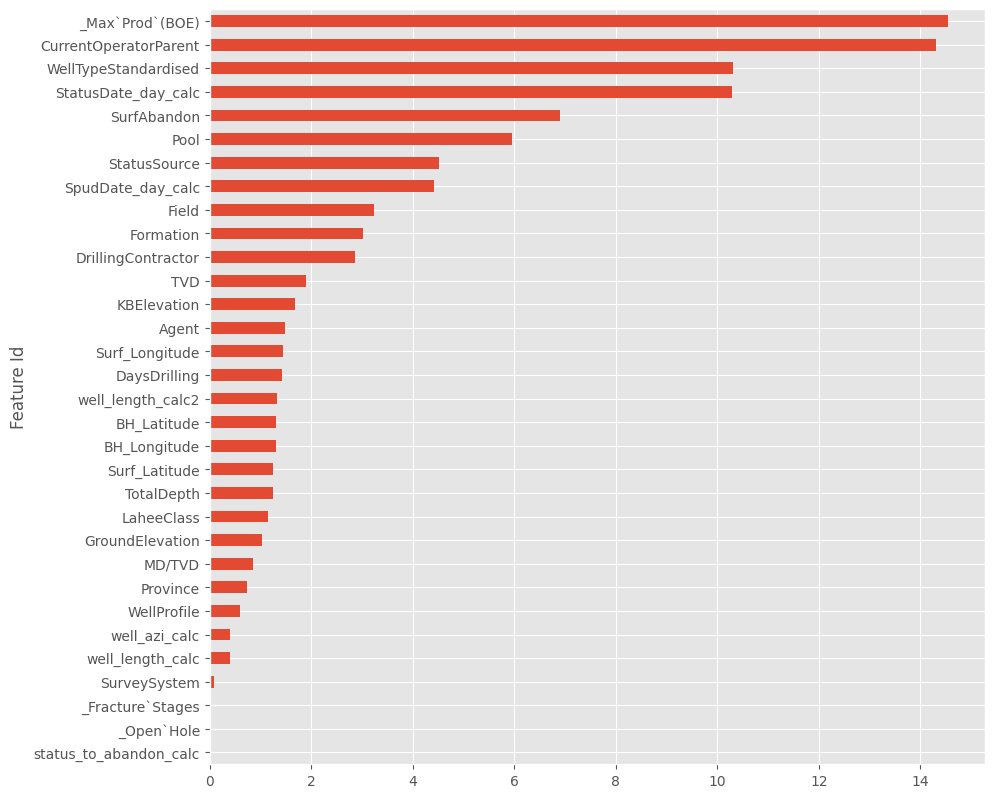

In [106]:
plt.figure(figsize=(10,10))
feat_im.set_index('Feature Id').mean(axis=1).sort_values(ascending=True).plot(kind='barh')